## Data Preparation

In [ ]:
from CNNPipeline import DataPreparation, CNNModel
import os

In [ ]:
dataset_folder = 'Resources/Dataset/Bonsai'
dataprep = DataPreparation(dataset_folder, img_size=(224, 224, 3), batch_size=32)

In [ ]:
data = dataprep.load_dataset(check_error=True, copy_to_local=False)

Error loading image: /content/Local_Dataset/Moyogi/7a9ca38b2a94f1c2292a420c866bc0df - Pintasan.lnk
                         Label  Count
0                       Bankan     62
1                      Bujinki    428
2                      Chokkan    466
3                  Fukiganashi    309
4                    Hokidachi    352
5                    Ikadabuki    212
6                    Kabodachi    357
7                       Kengai    393
8                       Moyogi    435
9                      Neagari    274
10                 Netsuranari     76
11                   Seki-Joju    399
12                      Shakan    370
13                   Sharimiki    293
14  Shokan atau twin [checked]    461
15                      Yoseue    299


In [ ]:
dataprep.describe_dataset(data)

Classes(16): Bankan, Bujinki, Chokkan, Fukiganashi, Hokidachi, Ikadabuki, Kabodachi, Kengai, Moyogi, Neagari, Netsuranari, Seki-Joju, Shakan, Sharimiki, Shokan atau twin [checked], Yoseue
Total number of images: 5186	||	Number of classes: 16
average image height: 729	||	average image width: 726	||	aspect ratio h/w: 1.0041322314049588


In [ ]:
train_df, val_df, test_df, train_additional = dataprep.split_dataset(data, train_size=0.7, upsample=True)

    Label           Train Count          Val Count       Test Count     
0   Bankan          44    +282           9               9              
1   Bujinki         300   +26            64              64             
2   Chokkan         326   +0             70              70             
3   Fukiganashi     216   +110           46              47             
4   Hokidachi       246   +80            53              53             
5   Ikadabuki       148   +178           32              32             
6   Kabodachi       250   +76            54              53             
7   Kengai          275   +51            59              59             
8   Moyogi          305   +21            65              65             
9   Neagari         192   +134           41              41             
10  Netsuranari     53    +273           12              11             
11  Seki-Joju       279   +47            60              60             
12  Shakan          259   +67            55        

In [ ]:
train_gen, val_gen, test_gen = dataprep.image_generator(train_df, val_df, test_df, aug_train=True, class_mode='categorical')

Found 5204 validated image filenames belonging to 16 classes.
Found 778 validated image filenames belonging to 16 classes.
Found 776 validated image filenames belonging to 16 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


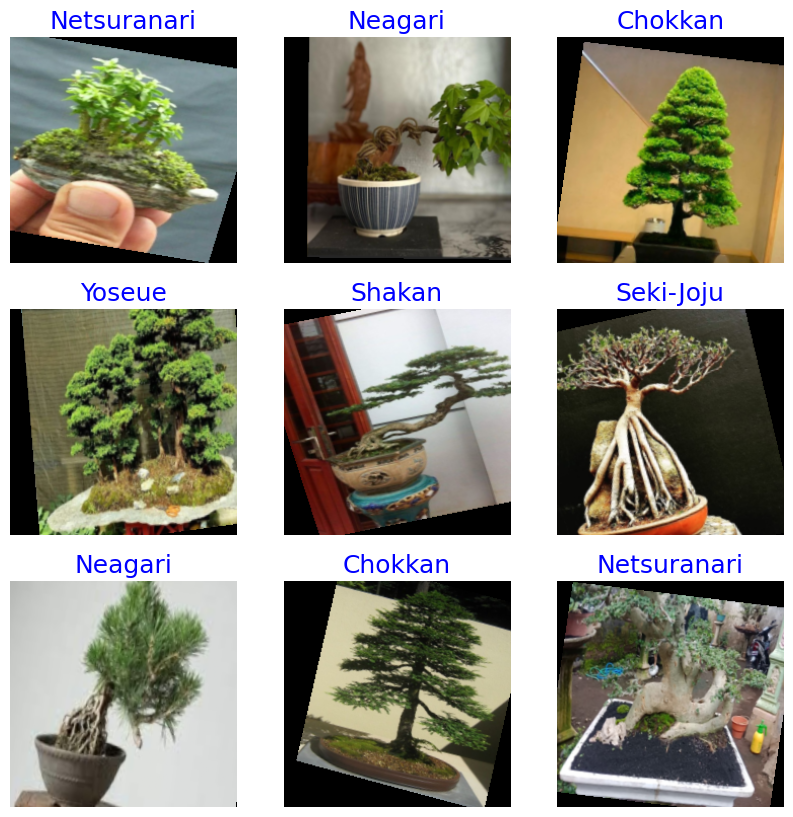

In [ ]:
dataprep.show_sample(train_gen)

## KERAS

In [ ]:
model_folder = 'Models'

#### Model

In [ ]:
classificator = CNNModel(model_folder, img_size=dataprep.img_size, classes=dataprep.classes, data_setup=dataprep.data_setup)
LAYERS = [
    ('FE', {'base': 'EfficientNetB3', 'lr': 0.001,  'trainable': False, 'pooling': 'max'}), # Adding base model for feature extraction
    # ('C', {'num_layers': 1, 'filters': 32, 'kernel_size': (5,5), 'pool_size': (2,2), 'activation': 'relu'}) # Adding convolutional network
    # ('F'), # Adding flatten layer
    ('BN', {'axis': -1, 'momentum': 0.99, 'epsilon': 0.001}), # Adding batch normalization layer
    ('FC', [256]), # Adding Fully Connected Layer
    ('D', 0.4), # Adding dropout layer
]
model = classificator.create_model(LAYERS)

43941136/43941136 [==============================] - 0s 0us/step
Created a Keras EffNet base model for feature extraction!
Added BatchNormalization layer with momentum=0.99 and epsilon=0.001.
Added 1 fully connected layers to the base model with [256] neurons and relu activation on it.
Added Dropout layer with rate=0.4.
Finalized model with 14 output classes.
Model with setup 0_EffNet_LR0.001_FE-MaxPool-BN-FC256-D0.4_CopiedToLocal-Upsampled-Augmented already exists! Loading that model instead...


Epoch 1/10
126/126 [==============================] - 151s 729ms/step - loss: 0.3328 - accuracy: 0.9168 - val_loss: 0.5053 - val_accuracy: 0.8841
Epoch 2/10
126/126 [==============================] - 85s 669ms/step - loss: 0.1453 - accuracy: 0.9518 - val_loss: 0.5336 - val_accuracy: 0.9063
Epoch 3/10
126/126 [==============================] - 83s 655ms/step - loss: 0.1041 - accuracy: 0.9670 - val_loss: 0.5960 - val_accuracy: 0.8934
Epoch 4/10
126/126 [==============================] - 81s 640ms/step - loss: 0.1005 - accuracy: 0.9690 - val_loss: 0.5757 - val_accuracy: 0.8864
Epoch 5/10
126/126 [==============================] - 81s 640ms/step - loss: 0.0859 - accuracy: 0.9748 - val_loss: 0.5553 - val_accuracy: 0.8852
Epoch 6/10
126/126 [==============================] - 80s 637ms/step - loss: 0.0764 - accuracy: 0.9780 - val_loss: 0.6070 - val_accuracy: 0.8841
Epoch 7/10
126/126 [==============================] - 82s 647ms/step - loss: 0.0674 - accuracy: 0.9803 - val_loss: 0.6301 - val_a

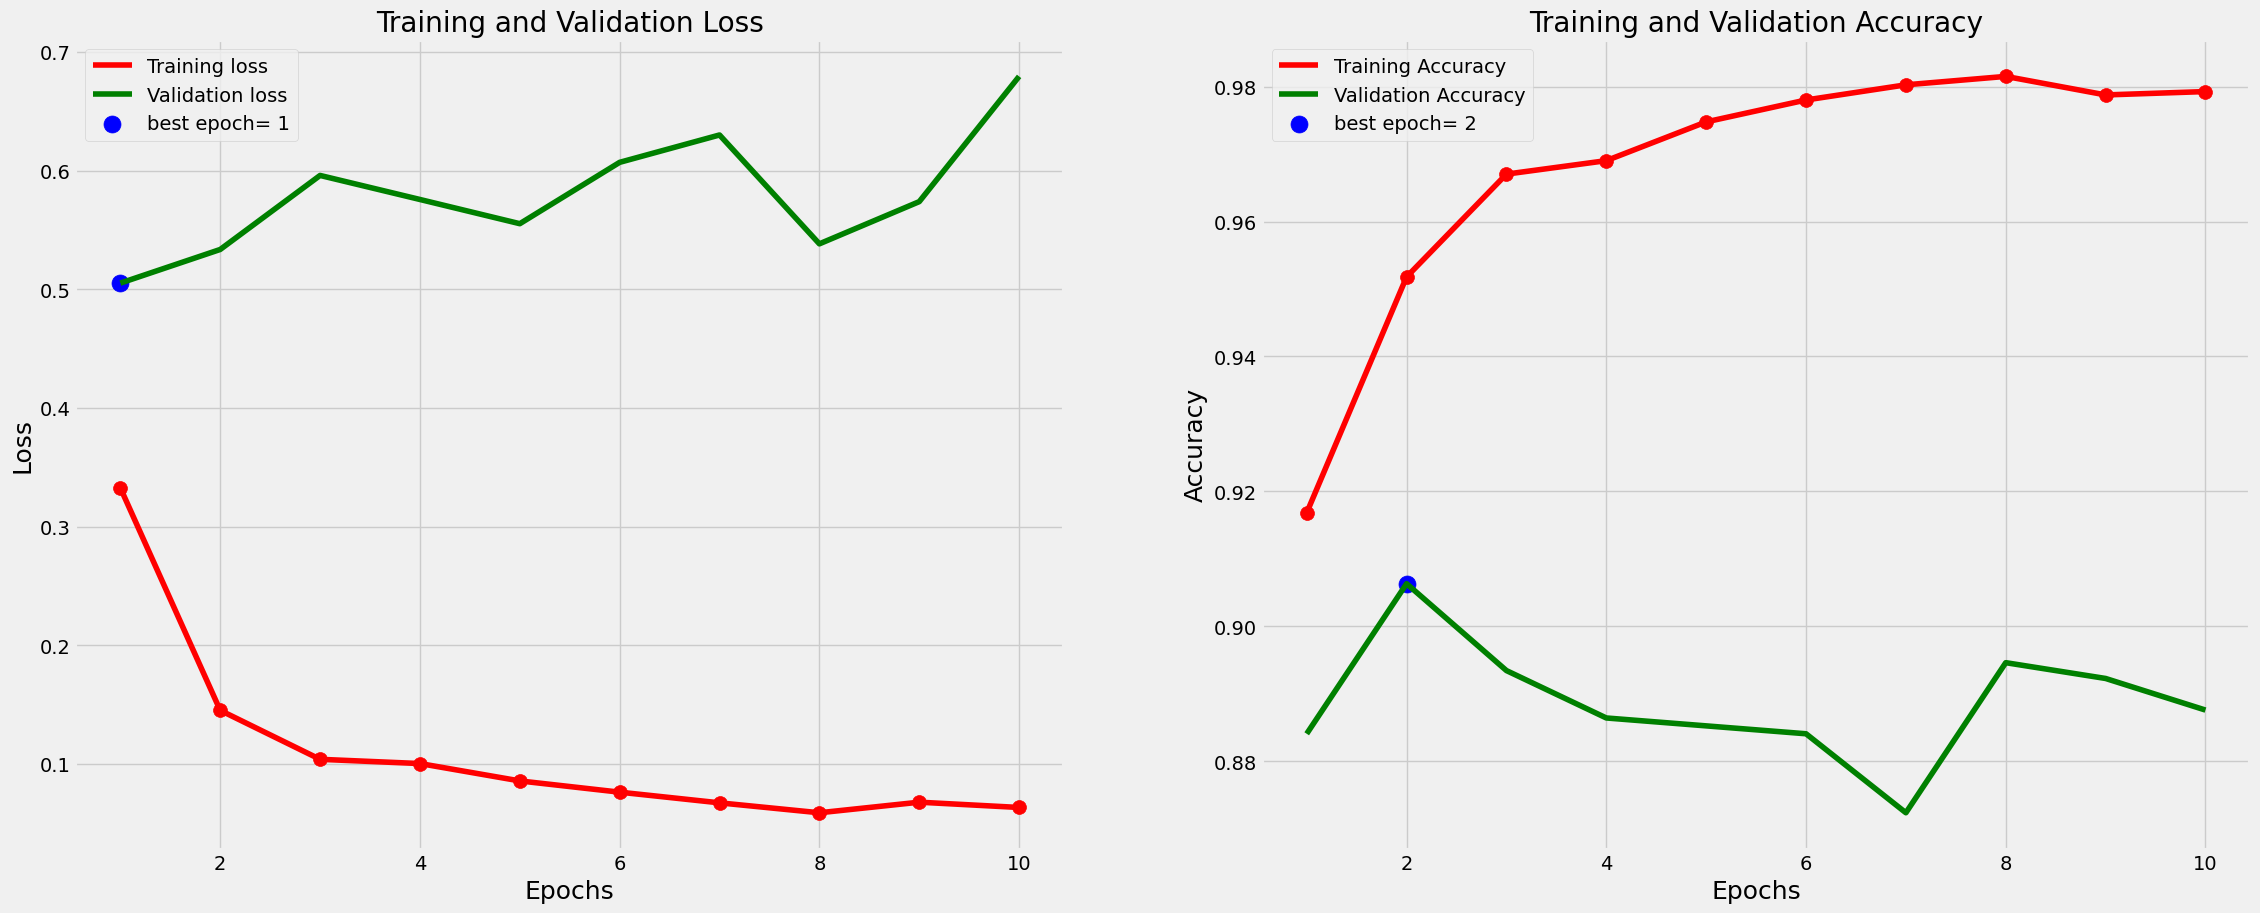

In [ ]:
history = classificator.train(model, train_gen, val_gen, epochs=5, callbacks=None)
classificator.visualize_train(history)

463/463 [==============================] - 12s 19ms/step
              precision    recall  f1-score   support

      Bankan       0.67      0.67      0.67         6
     Bujinki       0.93      0.95      0.94        40
     Chokkan       0.88      0.75      0.81        40
 Fukiganashi       1.00      0.94      0.97        32
   Hokidachi       1.00      0.86      0.93        29
      Kengai       0.97      0.92      0.94        61
      Moyogi       0.85      0.89      0.87        44
     Neagari       0.85      0.94      0.89        31
 Netsuranari       0.92      0.92      0.92        13
   Seki-Joju       0.92      0.85      0.88        13
      Shakan       0.84      0.90      0.87        48
   Sharimiki       0.89      0.98      0.93        42
      Yoseue       1.00      0.92      0.96        12
        twin       0.86      0.92      0.89        52

    accuracy                           0.90       463
   macro avg       0.90      0.88      0.89       463
weighted avg       0.90

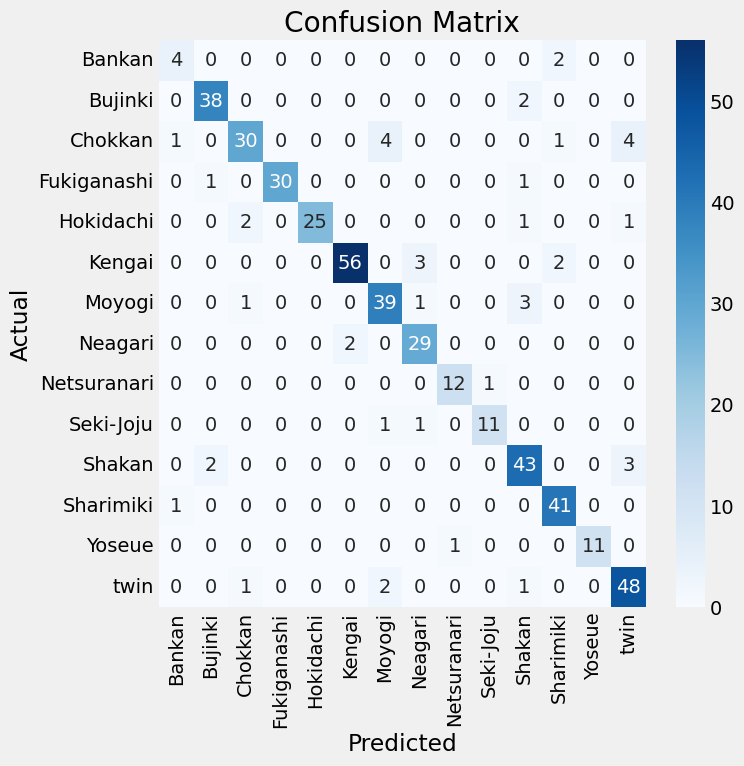

In [ ]:
classificator.evaluate(model, test_gen)
classificator.performance(k=1)

In [ ]:
classificator.export_model(model)